The goal of this was to get my feet wet in computational physics. This notebook computes the non-linear differential equation that describes the motion of a pendulum. Typically in differential equations (DE) and undergraduate physics courses the small angle approximation is applied (setting sin(theta) = theta) making a non-linear DE into a linear DE. This makes the solution to the DE separable and easily solvable. The nonlinear (without the small angle approximation) is not so trivial. The follow compares the undamped, linear solution of the pendulum to that of the damped, non-linear solution.

In [1]:
import numpy as np
from numpy import sin, cos
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.animation as animation

First we need to set up the equation. The second order DE is reduced to a set of first order equations.

In [2]:
# Equations
def equations(y0, t) :
    theta, x = y0
    f = [x,-c*x -(g/l) * sin(theta)]
    return f
def plot_results(time, theta1, theta2) :
    plt.plot(time, theta1[:,0])
    plt.plot(time,theta2)
    plt.title('Pendulum Motion: ' + 'Initial Angle = ' + str(initial_angle) + ' degrees')
    plt.xlabel('Time (s)')
    plt.ylabel('Angle (rad)')
    plt.legend(['nonlinear, damped', 'linear, undamped'], loc='lower right')

Then we need to define our constants and set parameters. For example, we can change the length of the pendulum here or even change the value of the acceleration due to gravity to that of the moon or Mars if we wanted. We also set our timestep.

In [3]:
# Parameters
g = 9.81 # accel due to gravity (m/s^2)
l = 1.0 # length of pendulum (m)
delta_t = 0.025 # time step (s)
time = np.arange(0.0,10.0,delta_t) # time (s)

# Variables
c = 0.5 # damping constant

# Initial Conditions
initial_angle = 45.0
theta0 = np.radians(initial_angle)
x0 = np.radians(0.0) # Inital Velocity (rad/s)

Now we call the solver for the non-linear solution, and solve for the linear solution separately

In [4]:
# Solution to the nonlinear problem
theta1 = odeint(equations,[theta0, x0], time)

# Solution to linear problem
w = np.sqrt(g/l)
theta2 = [theta0 * cos(w*t) for t in time]

<IPython.core.display.Javascript object>


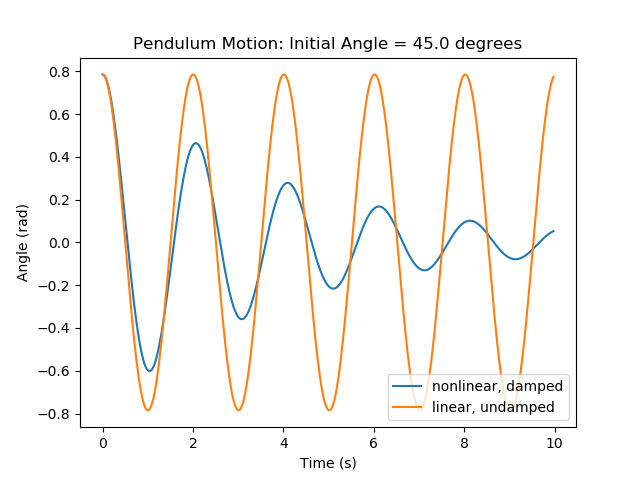

<IPython.core.display.Javascript object>


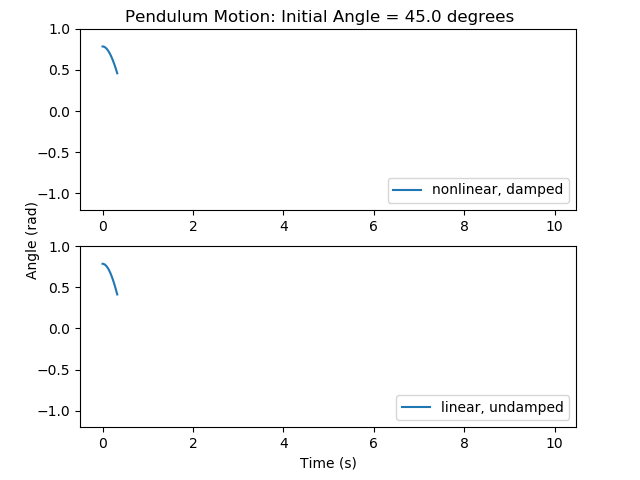

In [5]:
# plot results
%matplotlib notebook
plot_results(time,theta1,theta2)

# animated
y=theta1[:,0]
y2=theta2

fig, (ax1, ax2) = plt.subplots(2,1,sharey=True)
s = ('Initial Angle = ' + str(initial_angle) + ' degrees')
plt.suptitle('Pendulum Motion: ' + s)
line, = ax1.plot(time, y)
line2, = ax2.plot(time, y2)
plt.xlabel('Time (s)')
fig.text(0.04, 0.5, 'Angle (rad)', va='center', rotation='vertical')
ax1.set_ylim(-1.2,1)
ax1.legend(['nonlinear, damped'], loc='lower right')
ax2.legend(['linear, undamped'], loc='lower right')
plt.subplots_adjust(top=0.94)

def update(num, time, y, y2, line,line2):
    line.set_data(time[:num], y[:num])
    line2.set_data(time[:num], y2[:num])
    return line, line2

ani = animation.FuncAnimation(fig, update, len(time), fargs=[time, y,y2, line,line2],
                              interval=10, blit=True)
plt.show()